In [1]:
from DataGenerator import DataGenerator as DG
from tqdm import tqdm
import utils as ut
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.model_selection import train_test_split
from LF_1D import LF_Layer as LF
import torch
SEED=42


In [2]:
# Set the Parameters
device = 'cuda' if torch.cuda.is_available() else 'cpu'
params={'num_samples':6000,
        'num_wells':4,
        'width':10,
        'd_hole':0.1,
        'd_med':1,
        'HF_N':128,
        'LF_N':16,
        'num_train':4200,
        'num_test':1200,
        'num_val':600
        }
data_dir='./data'
lengths_dir=os.path.join(data_dir,'lengths')
y_dir=os.path.join(data_dir,'y')
print(f'device:{device}')

device:cuda


In [5]:
# Generate the data

# Initialize DG and other variables
dg = DG(params)
geo_list = dg.generate_geo(seed=SEED)
lengths_array = np.zeros((params['num_samples'], params['num_wells']))
y_array = np.zeros((params['num_samples'], params['HF_N']))


Generating data: 100%|██████████| 6000/6000 [00:00<00:00, 125267.92it/s]


In [ ]:
# label and save the data
log_interval = 100
log_file_path = './data_labeling_log.txt'
# Check if the log file exists, delete it if it does
if os.path.exists(log_file_path):
    os.remove(log_file_path)

# Create the log file
with open(log_file_path, 'w') as log_file:
    log_file.write("Log file created\n")

# Processing loop
for i, geo in enumerate(tqdm(geo_list, desc='Labeling data')):
    lengths = geo.lengths
    lengths_array[i] = lengths
    y = ut.label_lengths(lengths, params)
    y_array[i] = y
    if (i + 1) % log_interval == 0:
        with open(log_file_path, 'a') as log_file:
            log_file.write(f"Processed {i + 1} samples\n")

np.save(y_dir,y_array)
np.save(lengths_dir,lengths_array)

torch.Size([16])


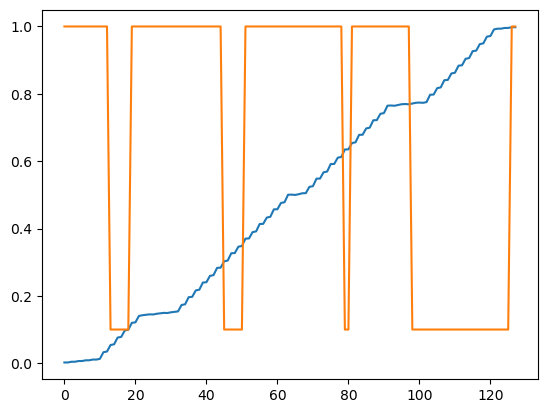

torch.Size([16])


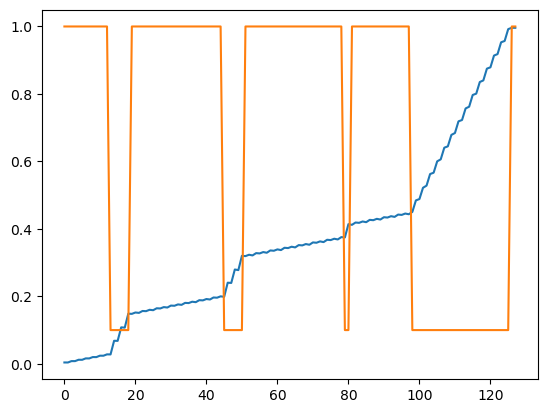

torch.Size([16])


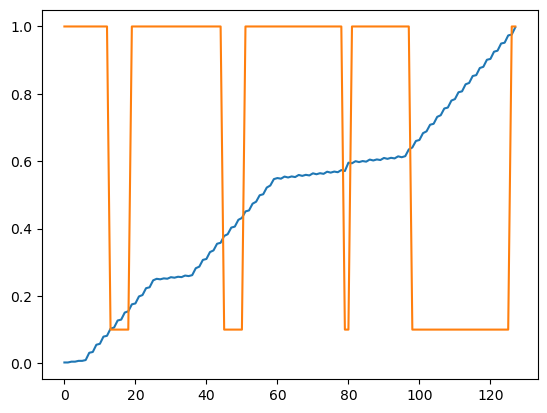

torch.Size([16])


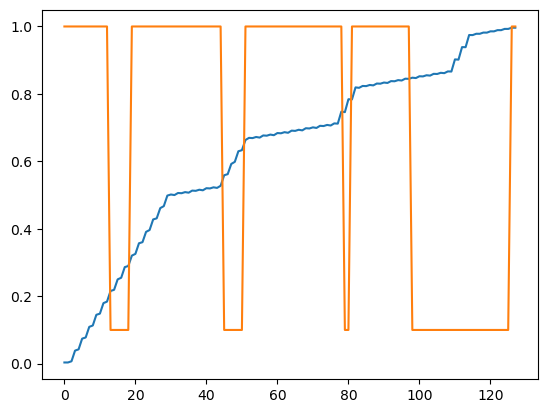

torch.Size([16])


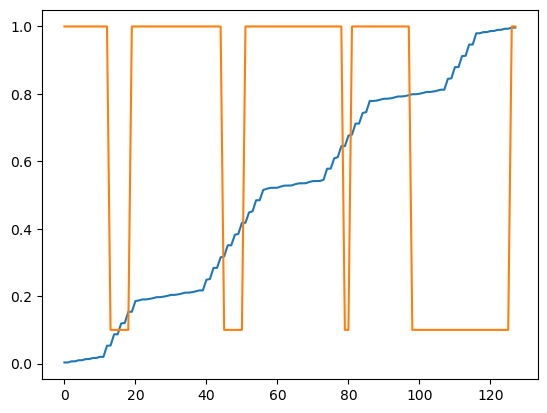

In [8]:
# Simple Check
# lengths_array=np.load(lengths_dir+'.npy')
y_array=np.load(y_dir+'.npy')
check_num=5

for i in range(check_num):
    d_HF=geo_list[i].get_D(N=params['HF_N'])
    d_LF=geo_list[i].get_D(N=params['LF_N'])
    d_LF_tensor=torch.tensor(d_LF)
    y_lf=LF.apply(d_LF_tensor,params)
    print(y_lf.shape)
    y_hf=y_array[i]
    plt.plot(y_hf)
    plt.plot(d)
    plt.show()

In [25]:
# Split data
y_array=np.load(y_dir+'.npy')
lengths_array=np.load(lengths_dir+'.npy')

y_train, y_temp, lengths_train, lengths_temp = train_test_split(
    y_array, lengths_array, train_size=params['num_train'], random_state=SEED
)

y_test, y_val, lengths_test, lengths_val = train_test_split(
    y_temp, lengths_temp, train_size=params['num_test'], test_size=params['num_val'], random_state=SEED
)
